# <center>  EDA </br>
#  <center> --  Analisis Exploratorio de los datos --</center>
## Se analiza las variables, sus comportamientos y relaciones 



Se lleva a cabo un análisis exploratorio de los datos con el propósito de descubrir patrones que proporcionen información clave para la toma de decisiones, específicamente orientadas a la reducción de víctimas fatales. Este proceso busca identificar tendencias y factores significativos que sirvan como base para estrategias efectivas en la prevención de siniestros viales.


_________________

### <center>Importar Librerias</center>

In [93]:
import numpy as np
import pandas as pd
import funciones
import os
import folium
# Se importan las librerias para el proyecto
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

____________________

### <center>Extracción de datos</center>

In [3]:
#Se pasa dirección del archivo
archivo = os.path.join('..', 'BD', 'homicidios.xlsx')

#Se extraen las tablas del archivo 'homicidios.xlsx', tabla: HECHOS y tabla: VICTIMAS
df_homicidio_h = pd.read_excel(archivo, sheet_name='HECHOS')
df_homicidio_v = pd.read_excel(archivo, sheet_name='VICTIMAS')

______________________


# <center> HOMICIDIOS - HECHOS

### <center>Visualización de las variables</center>

In [4]:
# Se ve la cantidad de registros y columnas
df_homicidio_h.shape

(696, 21)

In [5]:
# Se visualizan las columnas
df_homicidio_h.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [6]:
# Se renombran algunas columnas
df_homicidio_h = df_homicidio_h.rename(columns={'N_VICTIMAS': 'CANT_VICTIMAS',
                                                      'AAAA':'AÑO',
                                                      'MM':'MES',
                                                      'DD':'DIA',
                                                      'HH':'HORA_E',
                                                      'Calle':'CALLE',
                                                      'Altura':'ALTURA',
                                                      'Cruce':'CRUCE',
                                                      'Dirección Normalizada':'DIRECCION_NORM',
                                                      'Dirección Normalizada':'DIRECCION_NORM',
                                                      'pos x':'LONGITUD',
                                                      'pos y':'LATITUD',
                                                      'XY (CABA)':'XY'})


In [7]:
df_homicidio_h

,ID,CANT_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,HORA_E,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ALTURA,CRUCE,DIRECCION_NORM,COMUNA,XY,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


__________________

### <center>Verificación de Registros Duplicados</center>

In [8]:
#Se verifica por el ID, que deberia ser único
duplicados = df_homicidio_h['ID'].duplicated()
cantidad_duplicados = duplicados.sum()
cantidad_duplicados


0

Se verificó que no hubieran registros duplicados en el dataframe

__________________________

### <center>Verificación de tipos de datos y nulos de datos</center>

In [9]:
funciones.verificar_tipo_datos(df_homicidio_h)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.00,0.00,0
1,CANT_VICTIMAS,[<class 'int'>],100.00,0.00,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
3,AÑO,[<class 'int'>],100.00,0.00,0
4,MES,[<class 'int'>],100.00,0.00,0
5,DIA,[<class 'int'>],100.00,0.00,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00,0
7,HORA_E,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
8,LUGAR_DEL_HECHO,[<class 'str'>],100.00,0.00,0
9,TIPO_DE_CALLE,[<class 'str'>],100.00,0.00,0


Después de examinar duplicados, nulos y tipos de datos, procederemos a analizar el contenido de cada variable. En caso necesario, corregiremos los tipos de datos y exploraremos las relaciones existentes entre las variables. Este análisis más profundo permitirá una comprensión más completa de la información y sus interconexiones.

___________________

## - Variable CUANTITATIVA: ALTURA

La columna que presenta más valores nulos es 'ALTURA', por lo que visualizaremos los valores que toma 'DIRECCION_NORM' 

In [10]:
valores = df_homicidio_h['DIRECCION_NORM'].unique()
valores


array(['PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.',
       'PAZ, GRAL. AV. y DE LOS CORRALES AV.', 'ENTRE RIOS AV. 2034',
       'LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.',
       'SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.',
       '27 DE FEBRERO AV. y ESCALADA AV.',
       'NOGOYA y GONZALEZ, JOAQUIN V.',
       'BELGRANO AV. e IRIGOYEN, BERNARDO DE', 'ENTRE RIOS AV. 1366',
       'SCALABRINI ORTIZ, RAUL AV. y VERA',
       'REGIMIENTO DE PATRICIOS AV. y QUINQUELA MARTIN, BENITO',
       'ACOSTA, MARIANO y JANER, ANA MARIA',
       'DE LA TORRE, LISANDRO y GARCIA GRANDE DE ZEQUEIRA, SEVERO',
       'SUIPACHA 156', 'DIRECTORIO AV. y CURAPALIGUE',
       '9 DE JULIO AV. y ALSINA, ADOLFO',
       'PAZ, GRAL. AV. y 27 DE FEBRERO AV.', 'HOLMBERG y VEDIA',
       'CURAPALIGUE AV. y DIAZ, AVELINO', 'VIAMONTE y 9 DE JULIO AV.',
       'CABILDO AV. y DEHEZA', 'PAZ, GRAL. AV. y ROCA, CNEL. AV.',
       'ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO',
       'CORRIENTES AV. y CALLAO

### Se decide eliminar la columna ya que en 'DIRECCION_NORM' tiene los números o la mayoria ocurre en cruces

In [11]:
# Se elimina columna Altura
df_homicidio_h = df_homicidio_h.drop('ALTURA', axis=1)

__________

## - Variable CUALITATIVA: CRUCE

In [12]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_homicidio_h[df_homicidio_h['CRUCE'].isnull()][['CRUCE', 'DIRECCION_NORM']][:15]

,CRUCE,DIRECCION_NORM
2,NaN,ENTRE RIOS AV. 2034
9,NaN,ENTRE RIOS AV. 1366
14,NaN,SUIPACHA 156
33,NaN,LIMA 1483
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI
38,NaN,NaN
42,NaN,"CAMPOS, LUIS M. AV. 30"
43,NaN,LIMA 1471
50,NaN,"MAGARIÃ‘OS CERVANTES, A. 3900"
59,NaN,LA PLATA AV. 2384


Los valores nulos, se debe a que el accidente no ocurrió en la intesección de calles o avenidas. Se podria borrar pero la vamos a dejar para evaluar donde ocurren más los accidentes. Haremos que tome un valor tipo (TRUE/FALSE)= (1/0))

In [13]:
# Se rellena valores nulos con 0
df_homicidio_h['CRUCE'] = df_homicidio_h['CRUCE'].fillna(0)

# Se convierte valores no nulos a 1
df_homicidio_h['CRUCE'] = df_homicidio_h['CRUCE'].apply(lambda x: 1 if x != 0 else 0)


In [ ]:
# Se verifica tipo de dato
funciones.verificar_tipo_datos(df_homicidio_h)

_________

## - Variable CUALITATIVA: CALLE

Se verifan los valores NaN de los registros en esta columna

In [15]:
# Se visualiza los valores Nan en CALLE
registros_nan_calle = df_homicidio_h[df_homicidio_h['CALLE'].isnull()]
registros_nan_calle


,ID,CANT_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,HORA_E,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORM,COMUNA,XY,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,0,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se decide eliminar el registro ya que no posee datos de ubicación 

In [16]:
# Se elimina registro 119
df_homicidio_h = df_homicidio_h.drop(index=119)

______________________

## - Variable CUALITATIVA: DIRECCION_NORM

In [17]:
# Se visualiza los valores Nan en DIRECCION_NORM
registros_nan_direccion = df_homicidio_h[df_homicidio_h['DIRECCION_NORM'].isnull()]
registros_nan_direccion

,ID,CANT_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,HORA_E,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORM,COMUNA,XY,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",0,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,0,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,0,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,0,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",0,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",0,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,0,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Se verifica que los valores NaN, son porque han sido siniestros en Autopistas. Se dejan ya que si bien no tienen una dirección, se sabe que fue en una autopista

Los valores que aparecen como float son los nan.

In [18]:
# Se verifica los valores float
valores_float = df_homicidio_h[df_homicidio_h['DIRECCION_NORM'].apply(lambda x: isinstance(x, float))]['DIRECCION_NORM']

# Se visualizanson de tipo float
valores_float.unique()


array([nan], dtype=object)

In [19]:
# Se cambia tipo de dato
df_homicidio_h['DIRECCION_NORM'] = df_homicidio_h['DIRECCION_NORM'].astype(str)


____________________________

## Variable CUANTITATIVA: HORA  y HORA_E

## - Variable numérica HORA_E

In [20]:
# Se verifica los valores que toma la columna HORA_E
conteo_hora = df_homicidio_h['HORA_E'].value_counts()
conteo_hora

HORA_E
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
15    25
20    25
1     24
4     23
0     23
2     17
13    17
SD     1
Name: count, dtype: int64

Se visualiza que en la columna HORA_E hay un valor no entero 'SD'. Como no se tiene dato, se decide averiguar cual es el valor de ese registro en la columna HORA para poder rellenarlo

In [21]:
# Se verifica valor en columna HORA para ese registro
registros_sd_hora = df_homicidio_h[df_homicidio_h['HORA_E'] == 'SD'][['HORA_E', 'HORA']]
registros_sd_hora

,HORA_E,HORA
518,SD,SD


Se encuentra que tampoco cuenta con dato en esta columna, y al ser solo un registro se decide eliminarlo

In [22]:
# Se elimina registro 119
df_homicidio_h = df_homicidio_h.drop(index=518)

________________

## - Variable Numérica HORA

Se decide eliminarla columna HORA, ya que se cuenta con la columna HORA_E

In [23]:
df_homicidio_h = df_homicidio_h.drop(columns='HORA')

__________________

## - Variable numérica HORA_E

Se cambia el nombre de la columna

In [24]:
# Se renonmbra la columna
df_homicidio_h = df_homicidio_h.rename(columns={'HORA_E': 'HORA'})

______________

In [25]:
funciones.verificar_tipo_datos(df_homicidio_h)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.0,0.0,0
1,CANT_VICTIMAS,[<class 'int'>],100.0,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
3,AÑO,[<class 'int'>],100.0,0.0,0
4,MES,[<class 'int'>],100.0,0.0,0
5,DIA,[<class 'int'>],100.0,0.0,0
6,HORA,[<class 'int'>],100.0,0.0,0
7,LUGAR_DEL_HECHO,[<class 'str'>],100.0,0.0,0
8,TIPO_DE_CALLE,[<class 'str'>],100.0,0.0,0
9,CALLE,[<class 'str'>],100.0,0.0,0


______________________

## - Variable CUANTITATIVA: XY,  LONGITUD, LATITUD

Se observan faltante de valores por lo que se decide rellenarlos con 0 para poder graficar en el dshboard. Esos accidentes fueron en Autopistas por lo que no se puede rastrear la altura del hecho

In [26]:
# Se reemplazan el . por 0 en la colimna LONGITUD
df_homicidio_h['LONGITUD'] = df_homicidio_h['LONGITUD'].replace('.', 0)

In [27]:
# Se reemplaza el . por 0 en la columna LATITUD
df_homicidio_h['LATITUD'] = df_homicidio_h['LATITUD'].replace('.', 0)
df_homicidio_h['XY'] = df_homicidio_h['XY'].replace('Point (. .)', 0)

In [28]:
# Se reemplaza en la columna XY los .. por 0
df_homicidio_h['XY'] = df_homicidio_h['XY'].replace('Point (. .)', 0)

In [29]:
# Se convierte 'LONGITUD' y 'LATITUD' a tipo de dato float
df_homicidio_h['LONGITUD'] = pd.to_numeric(df_homicidio_h['LONGITUD'], errors='coerce')
df_homicidio_h['LATITUD'] = pd.to_numeric(df_homicidio_h['LATITUD'], errors='coerce')


Se convierten estas variables a tipo flotante para posibilitar su representación en un mapa, dado que la geolocalización no admite tipos de datos en formato de texto.

____________________

## - Variable CATEGORICA: VICTIMA

In [30]:
df_homicidio_h['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

Se verifican dos tipos de datos no definidos 'objeto fijo' y peaton_moto'

In [31]:
df_homicidio_h[df_homicidio_h['VICTIMA'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,ID,CANT_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORM,COMUNA,XY,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
230,2017-0108,2,2017-09-02,2017,9,2,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",1,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,1,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.527838,-34.610470,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se decide cambiar por otra categoria, ya que no figura en el diccionario de datos posibles.  Se decide por categoría 'OTRO', ya que se tiene el dato pero no es claro

In [32]:
# Se cambia por OTRO
df_homicidio_h['VICTIMA'] = df_homicidio_h['VICTIMA'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})

_______________________

## - Variable CATEGORICA: ACUSADO

In [33]:
df_homicidio_h['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Esta perfecta

____________________

## Verificar tipo de datos

In [34]:
funciones.verificar_tipo_datos(df_homicidio_h)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.0,0.0,0
1,CANT_VICTIMAS,[<class 'int'>],100.0,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
3,AÑO,[<class 'int'>],100.0,0.0,0
4,MES,[<class 'int'>],100.0,0.0,0
5,DIA,[<class 'int'>],100.0,0.0,0
6,HORA,[<class 'int'>],100.0,0.0,0
7,LUGAR_DEL_HECHO,[<class 'str'>],100.0,0.0,0
8,TIPO_DE_CALLE,[<class 'str'>],100.0,0.0,0
9,CALLE,[<class 'str'>],100.0,0.0,0


_________________
___________________

# <center> HOMICIDIOS - VICTIMA

In [35]:
# Se visualiza el dataframe
df_homicidio_v

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Contiene 717 registros y 10 columnas o variables

___________________

## Se verifian los datos

In [36]:
funciones.verificar_tipo_datos(df_homicidio_v)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID_hecho,[<class 'str'>],100.0,0.0,0
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,AAAA,[<class 'int'>],100.0,0.0,0
3,MM,[<class 'int'>],100.0,0.0,0
4,DD,[<class 'int'>],100.0,0.0,0
5,ROL,[<class 'str'>],100.0,0.0,0
6,VICTIMA,[<class 'str'>],100.0,0.0,0
7,SEXO,[<class 'str'>],100.0,0.0,0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0,0


Datos nulos no hay

_______________________________________________

## Se elimina columnas innecesarias

Se unirá esta tabla a la anterior por medio del id, por lo que nos quedamos solo con los datos importantes

In [37]:
# Se dejan las columnas necesarias
df_homicidio_v = df_homicidio_v[['ID_hecho', 'ROL', 'SEXO', 'EDAD']]


## Se cambia el nombre de las columnas

Para una mejor identificación se renombran las columnas

In [38]:
# Se renombra columnas
df_homicidio_v = df_homicidio_v[['ID_hecho', 'ROL', 'SEXO', 'EDAD']].rename(columns={'ID_hecho':'ID'})

In [39]:
# Se visualizan los 2 primeros registros
df_homicidio_v.head(2)

,ID,ROL,SEXO,EDAD
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70


___________________

## Datos duplicados

In [40]:
# Se verifica si hay registros duplicados
df_homicidio_v[df_homicidio_v.duplicated('ID')]

,ID,ROL,SEXO,EDAD
30,2016-0041,PASAJERO_ACOMPAÑANTE,MASCULINO,SD
99,2016-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,60
164,2017-0026,CONDUCTOR,MASCULINO,19
174,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,32
175,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,30
177,2017-0036,CONDUCTOR,MASCULINO,20
187,2017-0050,PASAJERO_ACOMPAÑANTE,MASCULINO,16
238,2017-0108,PASAJERO_ACOMPAÑANTE,MASCULINO,10
243,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,SD
254,2017-0126,CONDUCTOR,MASCULINO,36


Hay registros duplicados por ID pero hace referencia a más de un lesionado por accidente

____________________________________

## - Variable CUANTITATIVA: EDAD

se revisa al tener tipo de datos diferentes

In [41]:
# Se verica tipos de tatos que está tomando la variable
tipos_datos = df_homicidio_v['EDAD'].apply(type).value_counts()
tipos_datos

EDAD
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

In [42]:
# Se convierte la columna 'EDAD' a valores numéricos.
# errors='coerce' indica si no se puede convertir un valor a numérico,
# se asignará un valor NaN en su lugar.
df_homicidio_v['EDAD'] = pd.to_numeric(df_homicidio_v['EDAD'], errors='coerce')

# Se filtra los valores que no son numéricos
valores_str = df_homicidio_v[df_homicidio_v['EDAD'].isna()]['EDAD']
valores_str

30    NaN
33    NaN
35    NaN
36    NaN
39    NaN
55    NaN
63    NaN
72    NaN
89    NaN
93    NaN
108   NaN
119   NaN
121   NaN
138   NaN
141   NaN
142   NaN
165   NaN
176   NaN
182   NaN
225   NaN
243   NaN
275   NaN
277   NaN
299   NaN
328   NaN
359   NaN
367   NaN
371   NaN
377   NaN
391   NaN
421   NaN
444   NaN
446   NaN
454   NaN
457   NaN
461   NaN
463   NaN
469   NaN
479   NaN
498   NaN
506   NaN
529   NaN
530   NaN
548   NaN
552   NaN
555   NaN
563   NaN
572   NaN
579   NaN
631   NaN
639   NaN
647   NaN
698   NaN
Name: EDAD, dtype: float64

Si bien se ve que son valores vacíos no va a ser una columna a tener en cuenta en el analisis. Asi es que se elimina

In [43]:
# Se elmina columna EDAD
df_homicidio_v.drop('EDAD', axis=1, inplace=True)

Se ha optado por la eliminación de la columna 'EDAD' en virtud de que, aunque proporciona información valiosa sobre las edades de las personas fallecidas, el enfoque principal de este estudio se centra en identificar las calles más problemáticas y analizar a los responsables y víctimas. Esta decisión simplifica el conjunto de datos, permitiendo una concentración más precisa en los aspectos clave del análisis sin comprometer la integridad del estudio. 

_________________

## - Variable CATEGORICA SEXO

In [44]:
# Se verifica valores únicos
df_homicidio_v['SEXO'].unique

<bound method Series.unique of 0      MASCULINO
1      MASCULINO
2      MASCULINO
3      MASCULINO
4      MASCULINO
         ...    
712     FEMENINO
713     FEMENINO
714     FEMENINO
715    MASCULINO
716    MASCULINO
Name: SEXO, Length: 717, dtype: object>

Hace referencia al sexo de la persona involucrada en el accidente. Se encuantra correcta

_________________________

## - Variable CATEGORICA ROL

In [45]:
# Se verifican valores únicos
valores_rol = df_homicidio_v['ROL'].unique()
valores_rol


array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

In [46]:
# Se calcula la cantidad de registros con valores SD
cantidad_filas = len(df_homicidio_v[df_homicidio_v['ROL'] == 'SD'])

print(f"Cantidad de filas donde 'ROL' es igual a 'SD': {cantidad_filas}")


Cantidad de filas donde 'ROL' es igual a 'SD': 11


Al tratarse de pocos valores, se decide imputar el valor de ROL donde es SD(sin dato) para que sea mas preciso

In [47]:
# Se reemplaza "SD" con NaN en la columna
df_homicidio_v['ROL'] = df_homicidio_v['ROL'].replace('SD', pd.NA)

# Se calcula el valor más frecuente en la columna
valor_frecuente = df_homicidio_v['ROL'].mode().iloc[0]
print(f'El valor mas frecuente es: {valor_frecuente}')

# Se imputan los valores NaN con el valor más frecuente
df_homicidio_v['ROL'].fillna(valor_frecuente, inplace=True)

El valor mas frecuente es: CONDUCTOR


In [48]:
valores_rol = df_homicidio_v['ROL'].unique()
valores_rol

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'CICLISTA'],
      dtype=object)


La columna 'ROL' se revela como fundamental en el estudio de accidentes, desempeñando un papel crucial en la comprensión de la dinámica de los siniestros viales. Con el objetivo de garantizar una interpretación más completa de los datos, se procedió a imputar los valores faltantes en dicha columna. Esta medida contribuye significativamente a la integridad del análisis al asegurar que no se pierda información valiosa asociada a los roles desempeñados por los involucrados en los incidentes.

______________________

In [49]:
# Se verifican los datos
funciones.verificar_tipo_datos(df_homicidio_v)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.0,0.0,0
1,ROL,[<class 'str'>],100.0,0.0,0
2,SEXO,[<class 'str'>],100.0,0.0,0


______________

## Se unen los dataframe


Después de llevar a cabo el análisis individual de cada DataFrame, se procede a fusionarlos en un único conjunto de datos. Esta consolidación facilitará su utilización de manera más efectiva, permitiendo un manejo más eficiente y coherente de la información contenida en cada uno de los dataframes.

In [50]:
# Se hace la unión de ambos dataframe
df_siniestros = df_homicidio_h.merge(df_homicidio_v, on='ID', how='left', suffixes=('_h', '_v'))

# Se visualiza
df_siniestros

,ID,CANT_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,...,DIRECCION_NORM,COMUNA,XY,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,...,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,...,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,...,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2021-0093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,...,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO
711,2021-0094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",...,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO
712,2021-0095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,...,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO
713,2021-0096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",...,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO


Nuestro nuevo dataframe cuenta con 715 registros y 21 columnas o variables

___________________________________

## Se verifican nulos


In [51]:
# Se verifa tipo de datos
funciones.verificar_tipo_datos(df_siniestros)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.0,0.0,0
1,CANT_VICTIMAS,[<class 'int'>],100.0,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
3,AÑO,[<class 'int'>],100.0,0.0,0
4,MES,[<class 'int'>],100.0,0.0,0
5,DIA,[<class 'int'>],100.0,0.0,0
6,HORA,[<class 'int'>],100.0,0.0,0
7,LUGAR_DEL_HECHO,[<class 'str'>],100.0,0.0,0
8,TIPO_DE_CALLE,[<class 'str'>],100.0,0.0,0
9,CALLE,[<class 'str'>],100.0,0.0,0



Después de completar un análisis exhaustivo de los valores y tipos de datos de las variables, y tras consolidar la información en un solo dataframe, se procede a la identificación de patrones fundamentales. Este paso es crucial para la formulación de recomendaciones destinadas a la reducción de accidentes fatales. La búsqueda de patrones permitirá establecer conexiones significativas entre las variables, proporcionando una base sólida para el modelado de estrategias preventivas 

In [52]:
# Se eliminar registros con valor 0 en la columna 'LONGITUD'
#df_siniestros = df_siniestros[df_siniestros['LONGITUD'] != 0]

In [53]:

#df_siniestros = df_siniestros.dropna(subset=['COMUNA'])

_______________________________

### <center>Se almacena en un archivos csv</center>

In [54]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'siniestros_t.csv')

# Se guarda el DataFrame en el archivo CSV
df_siniestros.to_csv(siniestros, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {siniestros}')

Se guardó el archivo ..\CSV\siniestros_t.csv


_________________________
______________

## ANLISIS PROFUNDO

### <center>Se lee el archivos csv</center>

In [89]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'siniestros_t.csv')

# Se guarda el DataFrame en el archivo CSV
df_siniestros= pd.read_csv(siniestros)

In [90]:
funciones.verificar_tipo_datos(df_siniestros)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,ID,[<class 'str'>],100.00,0.00,0
1,CANT_VICTIMAS,[<class 'int'>],100.00,0.00,0
2,FECHA,[<class 'str'>],100.00,0.00,0
3,AÑO,[<class 'int'>],100.00,0.00,0
4,MES,[<class 'int'>],100.00,0.00,0
5,DIA,[<class 'int'>],100.00,0.00,0
6,HORA,[<class 'int'>],100.00,0.00,0
7,LUGAR_DEL_HECHO,[<class 'str'>],100.00,0.00,0
8,TIPO_DE_CALLE,[<class 'str'>],100.00,0.00,0
9,CALLE,[<class 'str'>],100.00,0.00,0


# Mapa de accidentes fatales

In [57]:
latitudes = df_siniestros.LATITUD.tolist()
longitudes = df_siniestros.LONGITUD.tolist()

mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=12)

for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

mapa

Después de realizar la visualización geográfica de los accidentes en CABA, se observa la distribución de los incidentes en el mapa. La cantidad de marcadores indica la ubicación de los siniestros y proporciona una representación espacial de la ocurrencia de accidentes en la ciudad.

Si bien no se puede sacar muchas conclusiones vemos que la General Paz (Autopista-Avenida) tiene muchos accidentes. Es la que rodea la ciudad del conourbano.

In [79]:
# Se genera un filtro para la calle General Paz
df_Gen_Paz = df_siniestros[df_siniestros["CALLE"]== "PAZ, GRAL. AV."]

In [82]:
# Se filtra la tabla para obtener las coordenadas de LONGITUD y LATITUD
coordenadas_gen_paz = df_Gen_Paz[["LATITUD", "LONGITUD"]]

# Se crea un mapa centrado en la Avenida General Paz
mapa_gen_paz = folium.Map(location=[coordenadas_gen_paz["LATITUD"].mean(), coordenadas_gen_paz["LONGITUD"].mean()], zoom_start=12)

# Se añade marcadores para cada accidente en la Avenida General Paz
for _, accidente in coordenadas_gen_paz.iterrows():
    folium.Marker([accidente["LATITUD"], accidente["LONGITUD"]]).add_to(mapa_gen_paz)

# Se guarda el mapa como un archivo HTML
mapa_gen_paz


______________________

In [88]:
# Se crear un mapa centrado en CABA
mapa_caba = folium.Map(location=[-34.6158, -58.4333], zoom_start=12)

# Se crea un conjunto de colores para asignar a cada comuna
colores_comunas = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'darkred', 'darkblue', 'darkgreen', 'darkorange', 'darkpurple']

# Se iterar sobre cada fila del DataFrame y agregar un marcador al mapa
for index, row in df_siniestros.iterrows():
    latitud, longitud, comuna = row['LATITUD'], row['LONGITUD'], row['COMUNA']
    
    # Se asignar un color según la comuna
    color = colores_comunas[comuna - 1]  # Restamos 1 porque las comunas son del 1 al 15, pero los índices de la lista empiezan en 0
    
    # Se crea el contenido del popup con el número de la comuna
    popup_content = f'Comuna {comuna}'
    
    # Se crear el objeto Popup
    popup = folium.Popup(popup_content, max_width=300)
    
    # Se agrega el marcador al mapa con el Popup
    folium.Marker(
        location=[latitud, longitud],
        popup=popup,
        icon=folium.Icon(color=color)
    ).add_to(mapa_caba)

# Se muestra
mapa_caba



## Cantidad de victimas fatales por mes

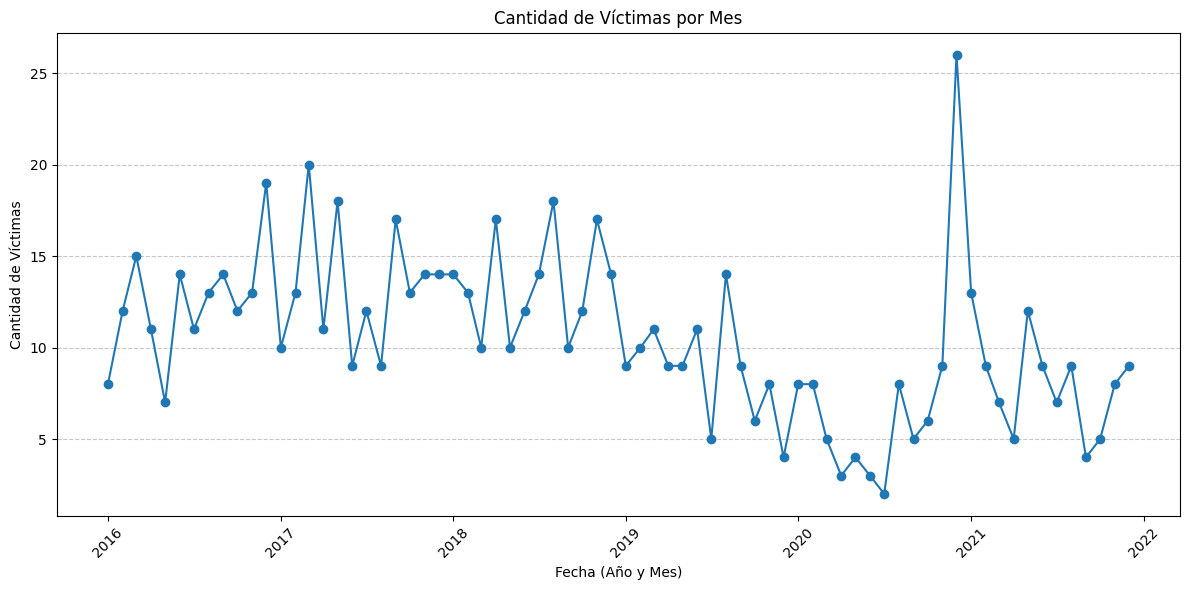

In [58]:

# Se agrupa por año y mes 
victimas_por_mes = df_siniestros.groupby(['AÑO', 'MES'])['CANT_VICTIMAS'].sum().reset_index()

# Se crea una columna 'FECHA' en formato datetime
victimas_por_mes['FECHA'] = pd.to_datetime(victimas_por_mes['AÑO'].astype(str) + '-' + victimas_por_mes['MES'].astype(str) + '-01')

# Se ordena por fecha
victimas_por_mes = victimas_por_mes.sort_values(by='FECHA')

# Se crea la gráfica
plt.figure(figsize=(12, 6))
plt.plot(victimas_por_mes['FECHA'], victimas_por_mes['CANT_VICTIMAS'], marker='o', linestyle='-')
plt.xlabel('Fecha (Año y Mes)')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



La cantidad de víctimas fatales por mes revela una tendencia relativamente estable a lo largo del tiempo, con una excepción notable en enero de 2021, donde se observa un marcado aumento. Se destaca que el año 2020 muestra la menor cantidad de víctimas fatales por mes en comparación con los demás años, lo cual se atribuye presumiblemente a las restricciones implementadas debido a la pandemia de COVID-19. Este descenso podría reflejar el impacto de las medidas de confinamiento y restricciones de movilidad que caracterizaron ese período, evidenciando cómo eventos externos pueden influir significativamente en las estadísticas de siniestros viales.

________________

## VICTIMAS POR AÑO

In [59]:
# Se calcula la cant de víctimas por año
df_siniestros.groupby("AÑO")["CANT_VICTIMAS"].sum().reset_index()

,AÑO,CANT_VICTIMAS
0,2016,149
1,2017,160
2,2018,161
3,2019,105
4,2020,87
5,2021,97


Con la información anterior se puede ver que hay un número de víctimas que no determinar su tendencia
por lo que se procede a graficar.

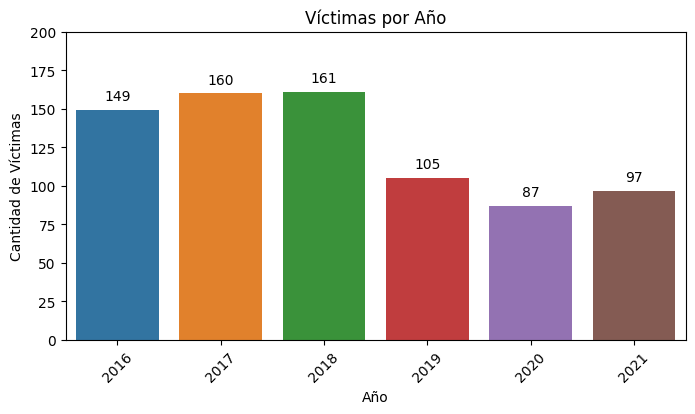

In [60]:
# Se grafica
victimas_por_año = df_siniestros.groupby("AÑO")["CANT_VICTIMAS"].sum().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=victimas_por_año, x="AÑO", y="CANT_VICTIMAS")
plt.title("Víctimas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 200)

# Se añade etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



Después de visualizar y analizar la tabla de víctimas por año, se destacan algunas conclusiones clave:

Tendencia General: Se observa una tendencia fluctuante en el número de víctimas fatales a lo largo de los años, con variaciones en las cifras anuales.

Descenso en 2020: El año 2020 muestra una marcada disminución en el número de víctimas fatales en comparación con los años anteriores. Esta reducción podría estar vinculada a las restricciones y medidas de confinamiento implementadas durante la pandemia de COVID-19.

Incremento en 2021: A pesar de la disminución en 2020, se observa un aumento en el número de víctimas fatales en 2021. Este incremento podría requerir un análisis más detallado para comprender las posibles razones detrás de este cambio.

Diferencias Anuales: Las variaciones en las cifras anuales subrayan la importancia de evaluar las circunstancias específicas de cada año para comprender las tendencias y tomar decisiones informadas en términos de seguridad vial.

Estas observaciones proporcionan una base para investigaciones adicionales y para la implementación de estrategias específicas en función de las necesidades cambiantes en cada año.

_______________

## Víctimas por semestre del año

Se crea columna que incluye el número de victimas por semestre.

In [61]:
# Se define el semestre
def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2

# Se agrega columna
df_siniestros["SEMESTRE"] = df_siniestros["MES"].apply(determinar_semestre)

In [62]:
# Se agrupa por semestre y año
df_siniestros.groupby(["AÑO", "SEMESTRE"])["CANT_VICTIMAS"].sum().reset_index()

,AÑO,SEMESTRE,CANT_VICTIMAS
0,2016,1,67
1,2016,2,82
2,2017,1,81
3,2017,2,79
4,2018,1,76
5,2018,2,85
6,2019,1,59
7,2019,2,46
8,2020,1,31
9,2020,2,56


Se puede observar la cantidad de víctimas agrupadas cada 6 meses y por año. Se grafica para una mejor visualización

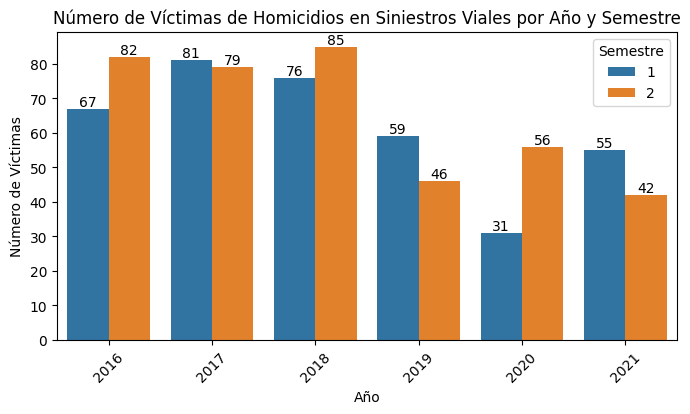

In [63]:
# Se grafica
df_agregado = df_siniestros.groupby(["AÑO", "SEMESTRE"])["CANT_VICTIMAS"].sum().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_agregado, x="AÑO", y="CANT_VICTIMAS", hue="SEMESTRE")
plt.title("Número de Víctimas de Homicidios en Siniestros Viales por Año y Semestre")
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.xticks(rotation=45)
plt.legend(title="Semestre")

# Se añade etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


Después de analizar los datos de víctimas por semestre, se pueden extraer las siguientes conclusiones:

Tendencias Anuales: A lo largo de los años, se observa una variabilidad en el número de víctimas entre los distintos semestres, indicando que la incidencia de siniestros viales no es uniforme a lo largo del tiempo.

Disminución Significativa en el Primer Semestre de 2020: El primer semestre de 2020 destaca por una marcada disminución en el número de víctimas en comparación con los semestres anteriores y posteriores. Esta reducción puede atribuirse a las restricciones y medidas implementadas durante la pandemia de COVID-19.

Cambio de Tendencia en el Segundo Semestre de 2020: El segundo semestre de 2020 muestra un aumento en comparación con el primer semestre del mismo año. Este cambio podría reflejar ajustes en las restricciones y movilidad durante la evolución de la pandemia.

Reducción en el Primer Semestre de 2021: Se observa una disminución en el número de víctimas en el primer semestre de 2021 en comparación con el segundo semestre de 2020. Este descenso puede indicar una respuesta efectiva a las condiciones cambiantes y una posible adaptación a la nueva normalidad.

Estas conclusiones proporcionan una visión general de las variaciones en la cantidad de víctimas por semestre, resaltando periodos de interés y cambios significativos que podrían guiar acciones específicas en términos de seguridad vial

__________________

## Número de Víctimas por Comuna


La distribución de la Ciudad Autónoma de Buenos Aires en comunas añade una dimensión importante para comprender la problemática de los siniestros viales. Identificar cuál de estas comunas presenta una mayor letalidad proporciona una perspectiva detallada sobre las áreas más afectadas por accidentes fatales. Este enfoque facilita la implementación de medidas específicas y adaptadas a cada comuna, permitiendo una intervención más precisa y efectiva en la mejora de la seguridad vial. Con esta información, se pueden desarrollar estrategias localizadas que aborden los desafíos específicos de cada área, contribuyendo así a la reducción de incidentes y a la protección de la vida de los ciudadanos.

In [64]:
# Se genera un filtro que nos ayude a saber el numero de victimas por comuna.
df_siniestros.groupby(["COMUNA"])["CANT_VICTIMAS"].sum().reset_index()

,COMUNA,CANT_VICTIMAS
0,0,1
1,1,101
2,2,25
3,3,48
4,4,85
5,5,22
6,6,24
7,7,66
8,8,71
9,9,79


Se visualiza una comuna 0, por lo que se consulta a https://www.argentina.gob.ar/caba/comunas y al ver que no existe se elimina para que no interfiera.

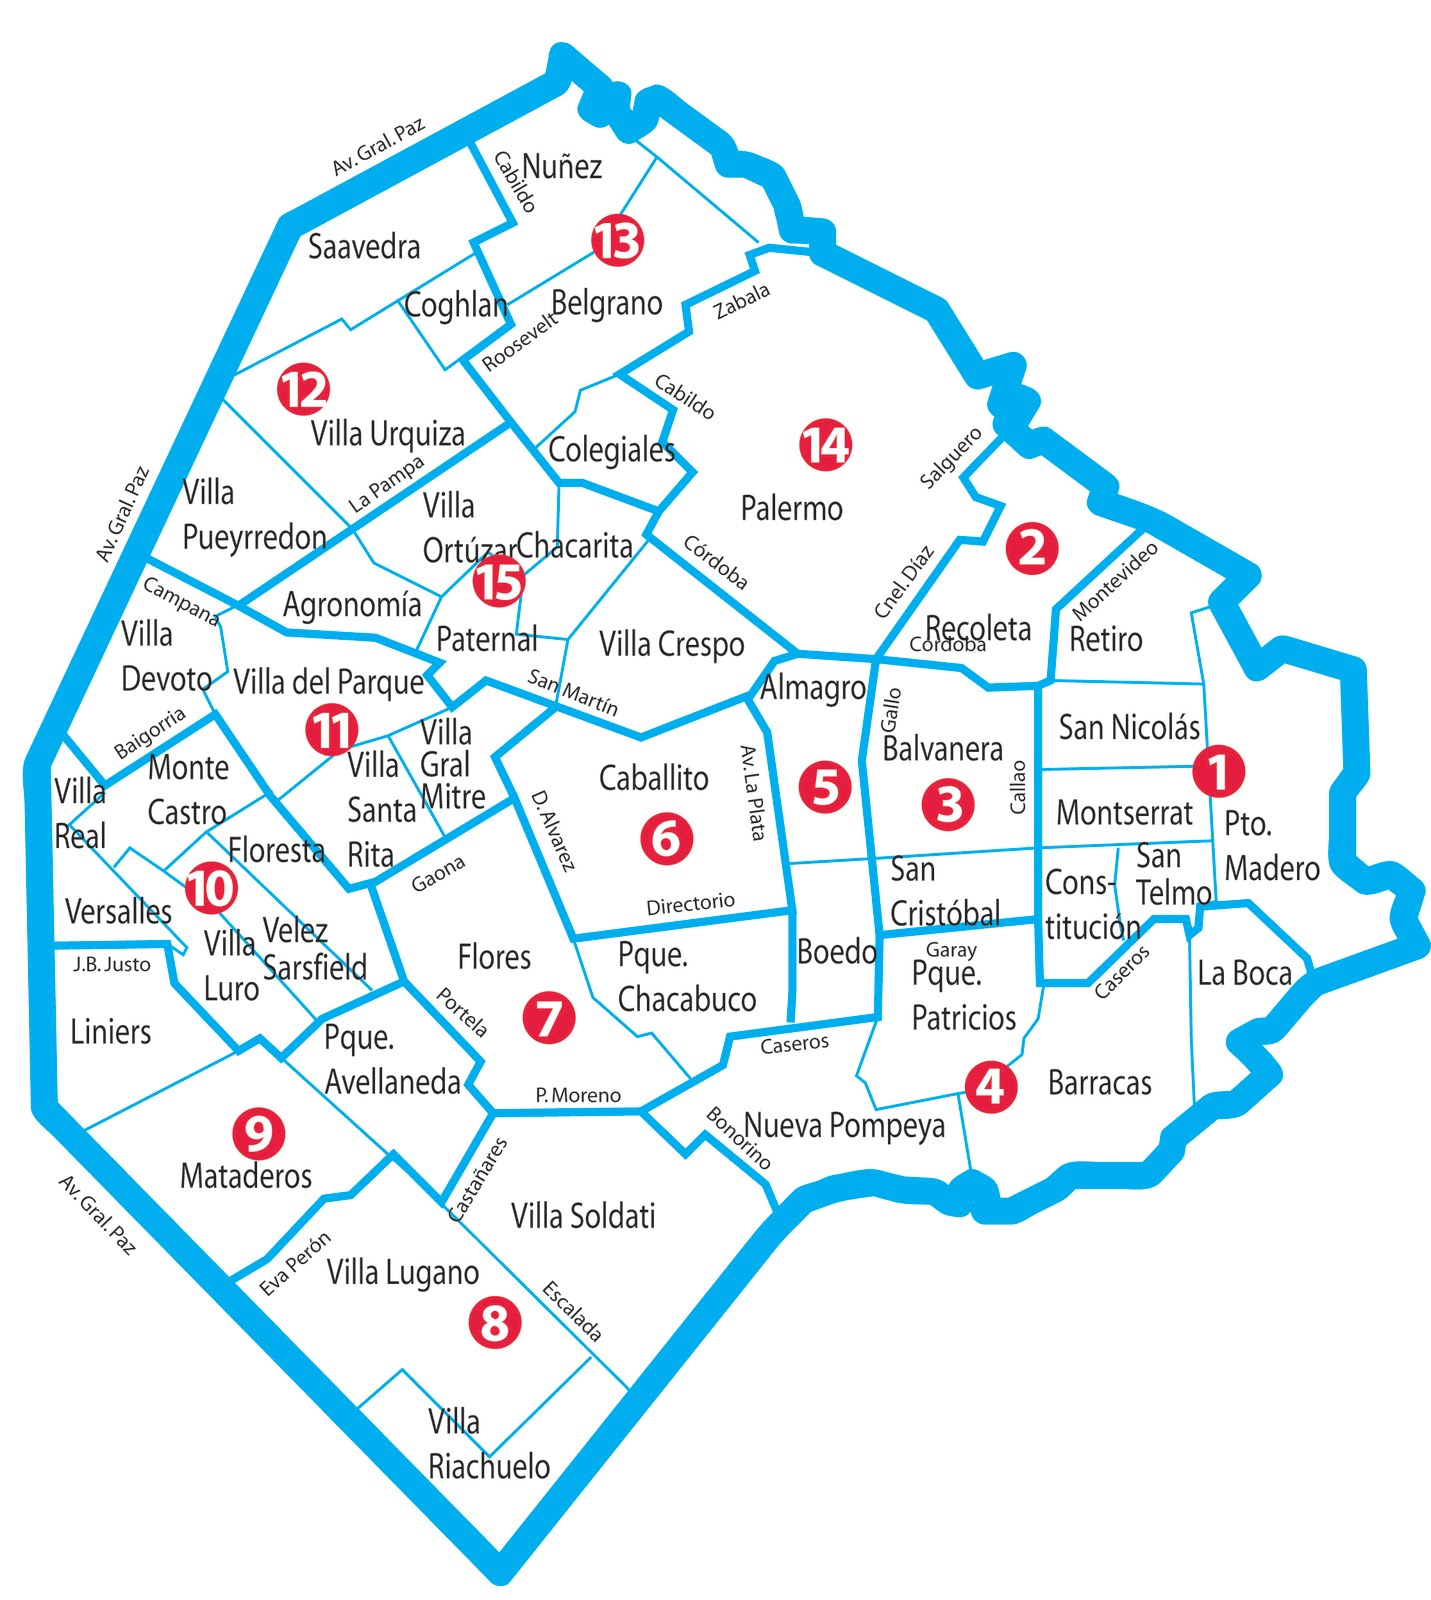{:width="01%"}


In [65]:
# Se elimina la comuna 0
df_siniestros.drop(df_siniestros[df_siniestros["COMUNA"] == 0].index, inplace=True)

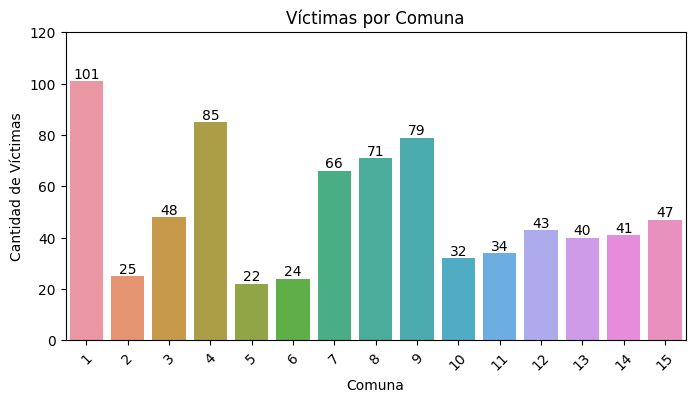

In [66]:
# Se grafica
suma_victimas_por_comuna = df_siniestros.groupby("COMUNA")["CANT_VICTIMAS"].sum().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=suma_victimas_por_comuna, x="COMUNA", y="CANT_VICTIMAS")
plt.title("Víctimas por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 120)

# Se añade etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


Se concluye que la comuna 1 es la las peligrosa, segun lo buscado en la pagina https://www.argentina.gob.ar/caba/comunas. la comuna 1 hace referencia a los barrios Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.

______________

## Número de victimas por hora del día

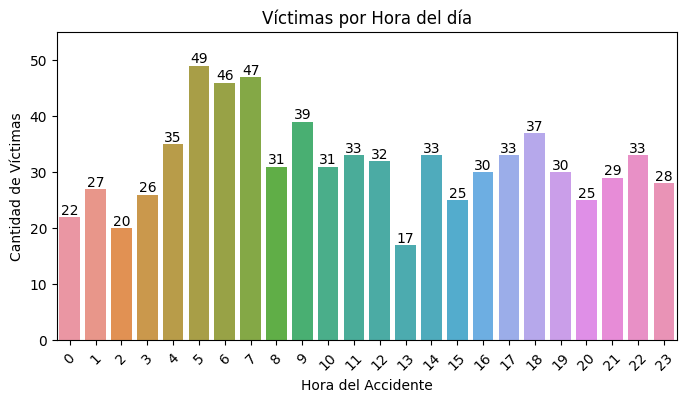

In [67]:
# Supongamos que tu DataFrame se llama 'df_siniestros'
suma_victimas_por_hora = df_siniestros.groupby("HORA")["CANT_VICTIMAS"].sum().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=suma_victimas_por_hora, x="HORA", y="CANT_VICTIMAS")
plt.title("Víctimas por Hora del día")
plt.xlabel("Hora del Accidente")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 55)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


CONCLUSION: Se puede observar que la mayor cantidad de victimas se da en las primeras horas de la mañana (5-7) por lo que se considera el momento en que la gente se traslada hacia sus trabajos.

_____________

## Siniestro por tipo de calle y por comuna

Se procede al análisis detallado del tipo de calle involucrada en los siniestros viales, con el objetivo de comprender las características específicas de estas vías y su posible relación con la incidencia de accidentes. Esta exploración permitirá identificar patrones y tendencias relevantes, proporcionando insights valiosos para el diseño de estrategias dirigidas a mejorar la seguridad vial en diferentes tipos de calles.

<Figure size 800x400 with 0 Axes>

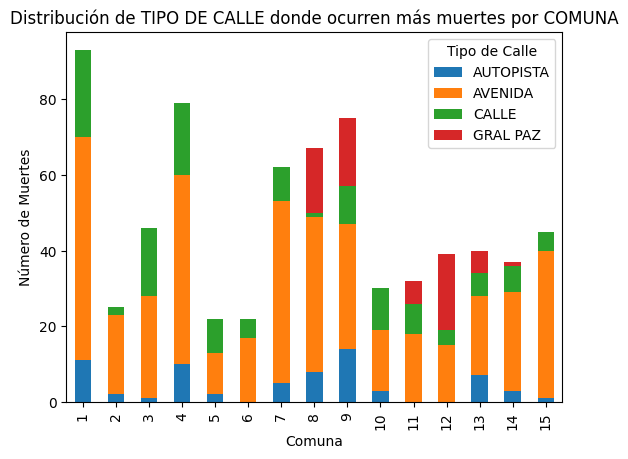

In [68]:
# Se grafica
pivot_table_3 = df_siniestros.pivot_table(index="COMUNA", columns="TIPO_DE_CALLE", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 4))
pivot_table_3.plot(kind="bar", stacked=True)
plt.title("Distribución de TIPO DE CALLE donde ocurren más muertes por COMUNA")
plt.xlabel("Comuna")
plt.ylabel("Número de Muertes")
plt.legend(title="Tipo de Calle", bbox_to_anchor=(1, 1))

plt.show()



En conclusión, tras analizar detenidamente los datos, se evidencia que las avenidas son consistentemente la causa principal de accidentes en la mayoría de los casos estudiados. Este hallazgo cobra relevancia al recordar que la Comuna 1 se destacó como la más problemática. Al observar que esta comuna alberga un mayor número de calles, especialmente avenidas, podemos inferir que la dimensión geográfica más extensa contribuye a una mayor probabilidad de ocurrencia de accidentes en dicha área.

__________________

## Victimas por Sexo

Se busca ver si el sexo influye en los accidentes

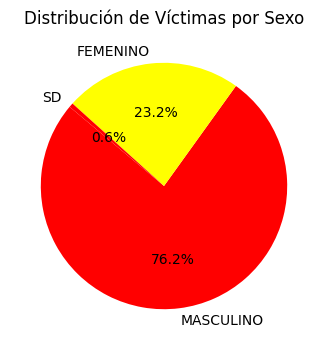

In [69]:
# Se grafica
conteo_sexo = df_siniestros["SEXO"].value_counts()

# Se crea la gráfica de pastel con colores rojo y amarillo
plt.figure(figsize=(4, 4))
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow'])

# Se añade un título
plt.title("Distribución de Víctimas por Sexo")

# Se muestra la gráfica
plt.show()




En conclusión, al analizar la columna de género, se observa una clara disparidad, donde aproximadamente el 76% de los casos corresponden a individuos de género masculino, mientras que el 24% restante corresponde a individuos de género femenino. Esta disparidad en la distribución de género en los datos sugiere la necesidad de considerar enfoques diferenciados en las estrategias de seguridad vial, con especial atención a las características y comportamientos específicos asociados a cada género, para abordar de manera efectiva los desafíos relacionados con los accidentes viales.

Analicemos el ROL:

In [70]:
# Se crea una tabla entre 'VICTIMA', 'ROL' y 'SEXO'
tabla_ROL = pd.crosstab([df_siniestros["VICTIMA"], df_siniestros["ROL"]], df_siniestros["SEXO"])

tabla_ROL

SEXO                            FEMENINO  MASCULINO  SD
VICTIMA   ROL                                          
AUTO      CONDUCTOR                    5         60   0
          PASAJERO_ACOMPAÑANTE        10         17   0
BICICLETA CICLISTA                     8         21   0
CARGAS    CONDUCTOR                    0          3   0
          PASAJERO_ACOMPAÑANTE         0          4   0
MOTO      CONDUCTOR                   16        244   3
          PASAJERO_ACOMPAÑANTE        20         18   0
MOVIL     CONDUCTOR                    0          1   0
          PASAJERO_ACOMPAÑANTE         0          2   0
OTRO      PASAJERO_ACOMPAÑANTE         0          3   0
          PEATON                       0          1   0
PASAJEROS PASAJERO_ACOMPAÑANTE         3          2   0
PEATON    PEATON                     103        162   0
SD        CONDUCTOR                    0          6   1
          PASAJERO_ACOMPAÑANTE         1          0   0

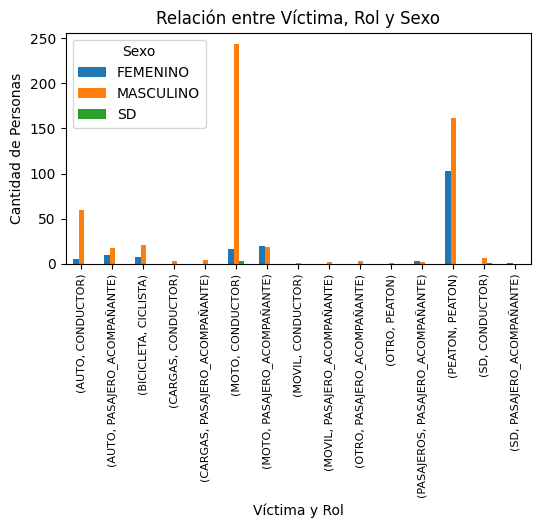

In [71]:
# Se grafica
tabla_ROL.plot(kind="bar", figsize=(6, 3))

# Se configura las etiquetas y el título
plt.xlabel("Víctima y Rol")
plt.ylabel("Cantidad de Personas")
plt.title("Relación entre Víctima, Rol y Sexo")

# Se ajusta el tamaño de la letra del eje x
plt.xticks(fontsize=8)

# Se muestra el gráfico
plt.tight_layout()
plt.legend(title="Sexo")
plt.show()



Después de analizar detenidamente la relación entre el sexo, el rol y la condición de víctima en los siniestros viales, se pueden extraer las siguientes conclusiones:

Distribución de Género por Rol y Víctima:

En los casos de conductores de automóviles y motocicletas, se observa una predominancia abrumadora de individuos masculinos, con el 76% y el 93% respectivamente.
En contraste, entre los pasajeros y acompañantes, la distribución de género varía según el medio de transporte, siendo más equitativa en algunos casos.

Asociación con el Riesgo:

La categoría de conductores de motocicletas muestra una proporción significativamente mayor de individuos masculinos, lo que podría indicar una mayor exposición al riesgo en este grupo.
Se identifica un caso donde la condición de "sin determinar" (SD) como conductor de motocicleta está asociada a un riesgo adicional, marcando una diferencia en la distribución de género en esta categoría específica.

Importancia del Análisis Detallado:

El desglose por género, rol y víctima proporciona información valiosa para entender las dinámicas específicas asociadas a cada grupo, permitiendo diseñar estrategias de seguridad vial más específicas y efectivas.

__________________

## Relación con los cruces de calles o avenidas

In [72]:
# Se generan las mascaras necesarias para saber el numero de victimas si hay o no cruce
victimas_con_cruce_true = df_siniestros[df_siniestros["CRUCE"] == 1]["CANT_VICTIMAS"].sum()
victimas_con_cruce_false = df_siniestros[df_siniestros["CRUCE"] == 0]["CANT_VICTIMAS"].sum()

print(f"Cantidad de víctimas cuando hay CRUCE: {victimas_con_cruce_true}")
print(f"Cantidad de víctimas cuando no hay CRUCE: {victimas_con_cruce_false}")

Cantidad de víctimas cuando hay CRUCE: 571
Cantidad de víctimas cuando no hay CRUCE: 187


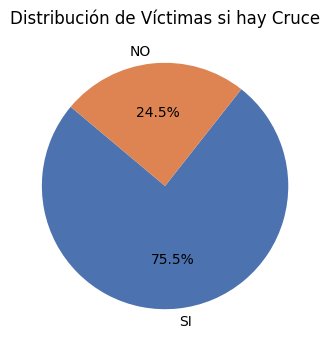

In [73]:
# Se grafica
conteo_cruce = df_siniestros["CRUCE"].value_counts()

# Se cambia los valores del índice
conteo_cruce.index = ["SI" if index == 1 else "NO" for index in conteo_cruce.index]

# Se crea la gráfica de pastel
plt.figure(figsize=(4, 4))
plt.pie(conteo_cruce, labels=conteo_cruce.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("deep"))

# Se añade un título
plt.title("Distribución de Víctimas si hay Cruce")

# Se muestra la gráfica
plt.show()



El análisis sobre la presencia o ausencia de cruce en los siniestros viales revela una diferencia significativa en la cantidad de víctimas, con 571 casos asociados a situaciones de cruce y 174 casos donde no hay cruce evidente. Las siguientes observaciones se pueden destacar:

Mayor Incidencia en Siniestros con Cruce:

La cantidad más elevada de víctimas se observa en situaciones donde hay cruce, lo que sugiere que la intersección de calles o caminos puede ser un factor contribuyente a la gravedad de los accidentes.

Importancia de la Seguridad en Cruces:

El análisis resalta la importancia de implementar medidas específicas de seguridad en intersecciones y cruces, dado que estos lugares emergen como puntos críticos con una mayor incidencia de víctimas.

Foco en Prevención en Intersecciones:

La información proporcionada sugiere la necesidad de un enfoque específico en la prevención de accidentes en intersecciones, incluyendo mejoras en señalización, regulación del tráfico y concienciación vial en estas áreas.

___________________


### Se analiza el rol en los accidentes en cruces

In [74]:
# Se genera un filtro para ver los roles de las personas cuando CRUCEs y el número de victimas
filtro_cruce_si1 = df_siniestros[df_siniestros["CRUCE"] == True]
muertes_por_rol = filtro_cruce_si1[filtro_cruce_si1["CANT_VICTIMAS"] > 0].groupby("ROL")["CANT_VICTIMAS"].count()
print(muertes_por_rol)

ROL
CICLISTA                 18
CONDUCTOR               250
PASAJERO_ACOMPAÑANTE     63
PEATON                  208
Name: CANT_VICTIMAS, dtype: int64


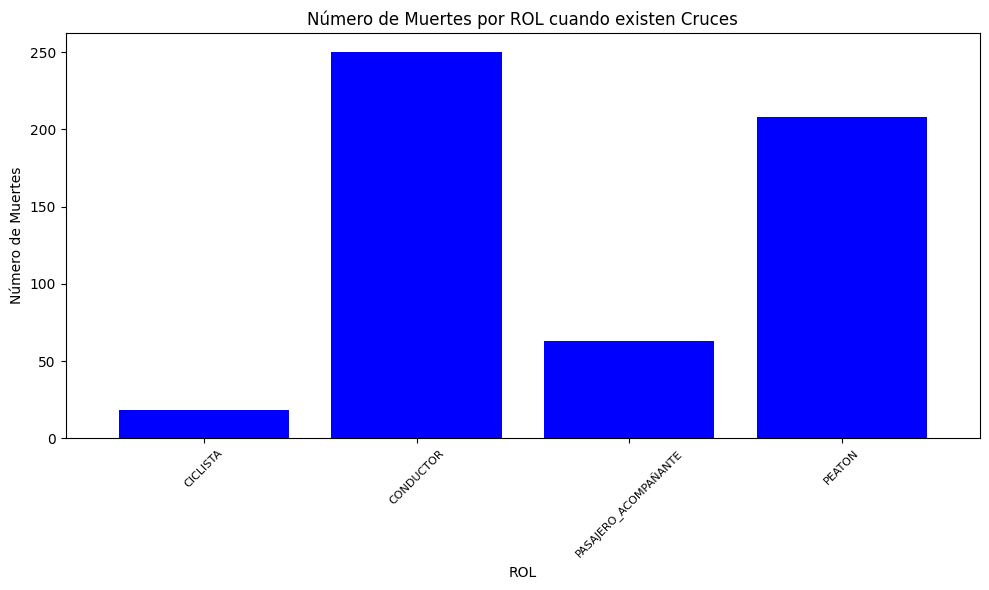

In [75]:
# Supongamos que 'muertes_por_rol' es tu Serie
plt.figure(figsize=(10, 6))
muertes_por_rol.plot(kind="bar", color="blue", width=0.8)  # Ajusta el ancho de las barras según sea necesario
plt.xlabel("ROL")
plt.ylabel("Número de Muertes")
plt.title("Número de Muertes por ROL cuando existen Cruces")
plt.xticks(rotation=45, fontsize=8)  # Ajusta el tamaño de la letra y la rotación
plt.tight_layout()
plt.show()


Basándonos en la cantidad de víctimas en situaciones de cruce y los roles asociados, se obtienen las siguientes conclusiones:

- Mayor Vulnerabilidad de Ciclistas y Peatones:

Se destaca que los ciclistas y peatones representan una proporción significativa de víctimas en situaciones de cruce, con 18 y 208 casos respectivamente. Esto sugiere una mayor vulnerabilidad de estos grupos en intersecciones y resalta la importancia de medidas específicas para proteger a ciclistas y peatones en entornos urbanos.


- Significativa Contribución de Conductores:

Los conductores también muestran una presencia considerable, con 250 casos de víctimas en cruces. Esto indica que, aunque los conductores pueden ser más protegidos por el vehículo, también enfrentan riesgos sustanciales en intersecciones.

- Rol de Pasajeros y Acompañantes:

Los pasajeros y acompañantes, con 63 casos, también contribuyen a la cantidad total de víctimas en situaciones de cruce. Este hallazgo sugiere la importancia de considerar la seguridad de los ocupantes de vehículos al abordar la problemática de los cruces.

En resumen, la distribución de roles en situaciones de cruce muestra la diversidad de factores y actores involucrados en los siniestros viales en intersecciones. Estos resultados subrayan la necesidad de enfoques integrales y adaptados a cada grupo de usuarios de la vía al desarrollar estrategias de seguridad vial en áreas de cruce.

__________

### Victimas por Acusado



Se quiere determinar el tipo de vehículo o circunstancia que más contribuye a la generación de siniestros viales. Para lograr esto, se procede a agrupar el tipo de víctima según el acusado o el responsable del incidente. Este enfoque no solo permite identificar los vehículos o motivos más involucrados en siniestros, sino que también proporciona información crucial sobre el perfil de las personas con una mayor propensión a sufrir lesiones fatales en accidentes de tránsito.

<Figure size 1200x600 with 0 Axes>

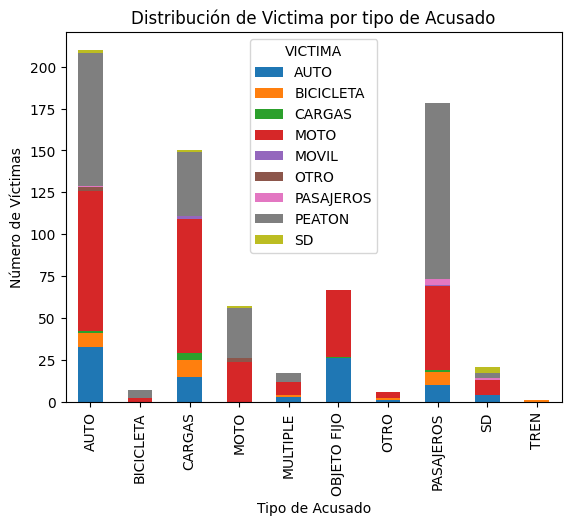

In [77]:
acusados = df_siniestros.pivot_table(index="ACUSADO", columns="VICTIMA", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
acusados.plot(kind="bar", stacked=True)
plt.title("Distribución de Victima por tipo de Acusado")
plt.xlabel("Tipo de Acusado")
plt.ylabel("Número de Víctimas")
plt.show()

In [78]:
acusados

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,OTRO,PASAJEROS,PEATON,SD
ACUSADO,,,,,,,,,
AUTO,33,8,1,84,0,2,1,79,2
BICICLETA,0,0,0,2,0,0,0,5,0
CARGAS,15,10,4,80,2,0,0,38,1
MOTO,0,0,0,24,0,2,0,30,1
MULTIPLE,3,1,0,8,0,0,0,5,0
OBJETO FIJO,26,0,1,40,0,0,0,0,0
OTRO,1,1,0,4,0,0,0,0,0
PASAJEROS,10,8,1,50,1,0,3,105,0
SD,4,0,0,9,0,0,1,3,4


Conclusiones al analizar la relación entre el tipo de víctima y el acusado en siniestros viales:

- Contribución Significativa de Motocicletas:

La MOTO cuando es el acusado, muestran una propensión significativa a causar víctimas, con 24 casos. Esto destaca la vulnerabilidad asociada a los accidentes de motocicletas y la necesidad de medidas específicas de seguridad.

- Impacto de Vehículos Tipo "Auto":

El AUTO como acusado, representan una cantidad considerable de víctimas, con 33 casos. Esto sugiere que, aunque los automóviles son comunes en siniestros, suelen resultar en menos víctimas en comparación con otros vehículos.

- Incidencia en Peatones y Pasajeros:

Se observa una alta cantidad de víctimas cuando los peatones y pasajeros son acusados, con 79 y 105 casos respectivamente. Esto resalta la importancia de la seguridad peatonal y la protección de ocupantes de vehículos.

- Objetos Fijos como Acusados:

La presencia de objetos fijos como acusados, principalmente en casos de colisiones con objetos en la vía, muestra un impacto considerable con 26 víctimas. La atención a la infraestructura vial y la prevención de colisiones con objetos fijos se revela como un aspecto crítico.
Desafíos en Cargas y Trenes:

Los siniestros involucrando cargas y trenes también presentan un número significativo de víctimas. Esto indica desafíos específicos asociados a estos tipos de vehículos y la necesidad de considerar medidas de seguridad específicas.

_________________
______________


Se ha brindado un análisis profundo de los accidentes viales, con sus respectivas conclusiones. 

______________________
_________________

## Pasamos a los KPIs (ver 4_KPI.ipynb)